#Intro - Implementing Various Classification Models - SVM, KNN, Naive Bayes
Understanding the imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Seaborn helps with adding color palettes to the plots

# Importing Data and setting up

In this project we will be using the Iris Dataset - one of the most well documented and well known datasets that novice ML engineers uses.

In [ ]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


Assign class names or the column of our dataset

In [ ]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [ ]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [ ]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail()

,sepal-length,sepal-width,petal-length,petal-width,Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Basic Data preprocessing step, assign predictor variable X and label variable y

In [ ]:
X = data.iloc[:, :-1].values  #data.iloc[all_rows:, :-1 to drop last column]
y = data.iloc[:, 4].values  #4 - class index is 4

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

Splitting the data into 70% training data and 30% for testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Standardising/Normalizing the data and putting in the formula
z = (x-mean)/Standard_Deviation

If you carefully observe the data, then you will notice that the data are of various range, to get better performing model, we have to normalize the data to fit the range of [0,1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 1. Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train);

In [ ]:
y_pred = classifier.predict(X_train)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-s

## 1.2 **Accuracy** of the Naive Bayes Model is `96.19%`

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy*100}%");

Accuracy: 96.19047619047619%


In [ ]:
test_pred = classifier.predict(X_test)


##1.3 Plotting the Confusion Matrix of GaussianNB

Now Lets use the Seaborn and Confusion_matrix to plot the model predictions on a Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix of Gaussian Naive Bayes')

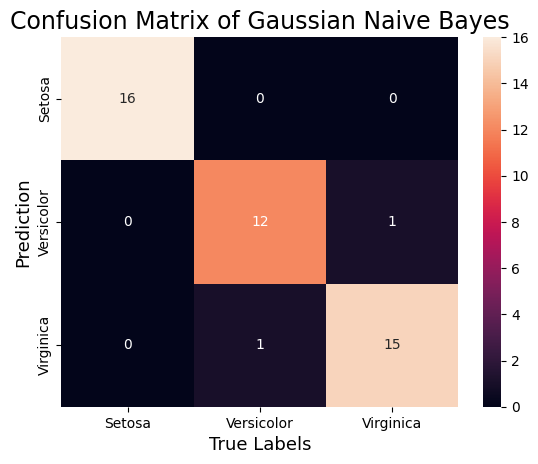

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, test_pred)
sns.heatmap(result,
            annot=True,   #annotate the labels
            fmt='g',      #generalize the floating points
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

plt.ylabel('Prediction', fontsize=13)
plt.xlabel('True Labels', fontsize=13)
plt.title("Confusion Matrix of Gaussian Naive Bayes", fontsize=17)


## 1.4 Using Classification to form a report on result

In [ ]:
result1 = classification_report(y_test, test_pred)
print(f"Classification Report: \n{result1}")

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100}")

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy: 95.55555555555556


Hence we have achieved an accuracy of `95.55%` with Naive Bayes Model(specifically `GaussianNB from sklearn.naive_bayes` )

2. Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_list.append(accuracy)

  print(f"accuracy of {i} : {accuracy}")

accuracy of linear : 0.9904761904761905
accuracy of poly : 0.9142857142857143
accuracy of rbf : 0.9809523809523809
accuracy of sigmoid : 0.9238095238095239


In [ ]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3],
}

2.2 Plot the accuracries for different kernels

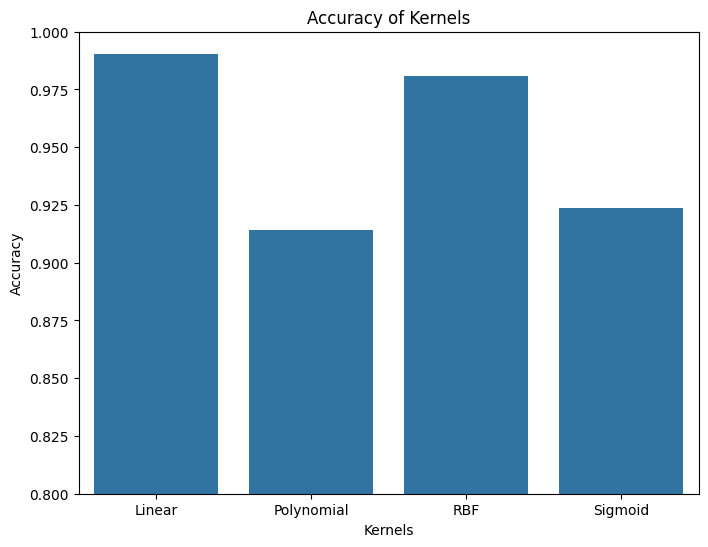

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

plt.title('Accuracy of Kernels')
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  #to limit the accuracy, and show difference more clearly
plt.show()

In SVM, wehave achieved the highest accuracy with Linear Kernel of `99.0%`closely second highest is with RBF of `98.09%`

In [ ]:
test_acc_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  test_pred = clf.predict(X_test)
  test_acc = accuracy_score(y_test, test_pred)
  test_acc_list.append(test_acc)

  print(f"Test Accuracy {i} : {test_acc}")

Test Accuracy linear : 0.9777777777777777
Test Accuracy poly : 0.8444444444444444
Test Accuracy rbf : 0.9777777777777777
Test Accuracy sigmoid : 0.9333333333333333


In [ ]:
test_accuracies = {
    'Linear': test_acc_list[0],
    'Polynomial': test_acc_list[1],
    'RBF': test_acc_list[2],
    'Sigmoid': test_acc_list[3],
}

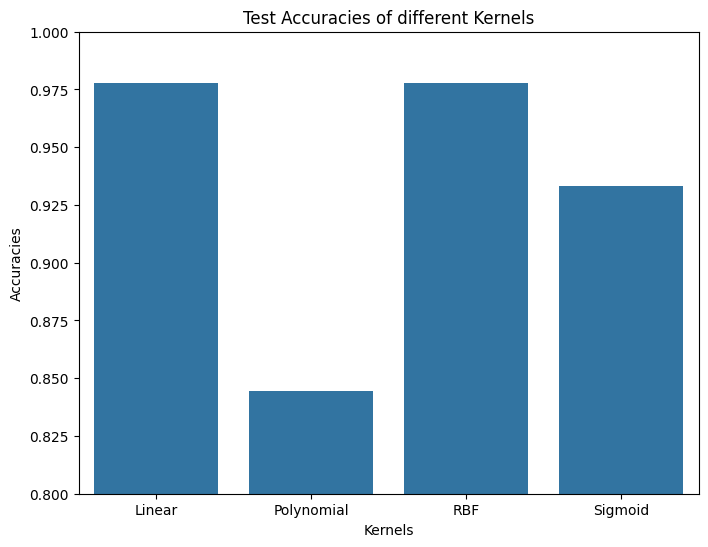

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x =list(test_accuracies.keys()), y = list(test_accuracies.values()))

plt.title("Test Accuracies of different Kernels")
plt.xlabel("Kernels")
plt.ylabel("Accuracies")
plt.ylim(0.8, 1.0)
plt.show()


Text(0.5, 1.0, 'Confusion Matrx of SVM ')

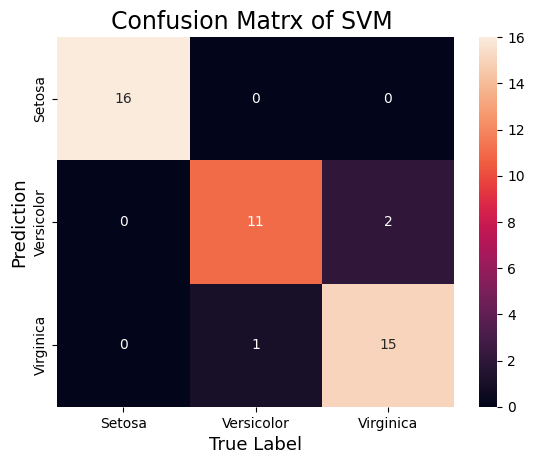

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

svm_result = confusion_matrix(y_test, test_pred)
sns.heatmap(svm_result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

plt.ylabel("Prediction", fontsize=13)
plt.xlabel('True Label', fontsize=13)
plt.title("Confusion Matrx of SVM ", fontsize=17)


Text(0.5, 1.0, 'Confusion Matrx of SVM kernel Linear ')

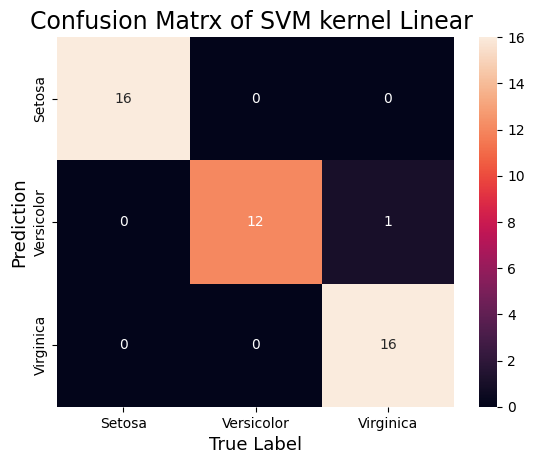

In [ ]:
  clf = SVC(kernel='linear')
  clf.fit(X_train, y_train)
  test_pred = clf.predict(X_test)

  svm_result = confusion_matrix(y_test, test_pred)
  sns.heatmap(svm_result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

  plt.ylabel("Prediction", fontsize=13)
  plt.xlabel('True Label', fontsize=13)
  plt.title(f"Confusion Matrx of SVM kernel Linear ", fontsize=17)

Text(0.5, 1.0, 'Confusion Matrx of SVM kernel Polynomial ')

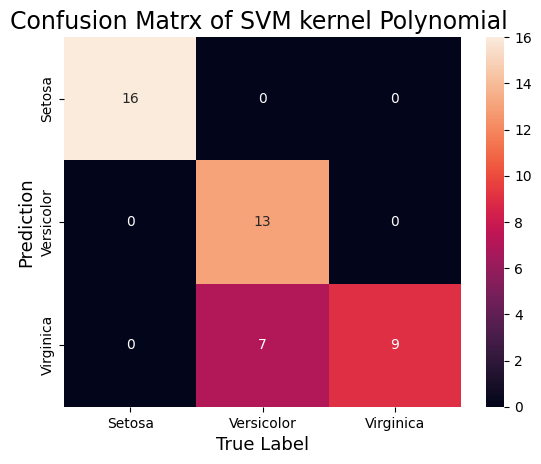

In [ ]:
  clf = SVC(kernel='poly')
  clf.fit(X_train, y_train)
  test_pred = clf.predict(X_test)

  svm_result = confusion_matrix(y_test, test_pred)
  sns.heatmap(svm_result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

  plt.ylabel("Prediction", fontsize=13)
  plt.xlabel('True Label', fontsize=13)
  plt.title(f"Confusion Matrx of SVM kernel Polynomial ", fontsize=17)

Text(0.5, 1.0, 'Confusion Matrx of SVM kernel sigmoid ')

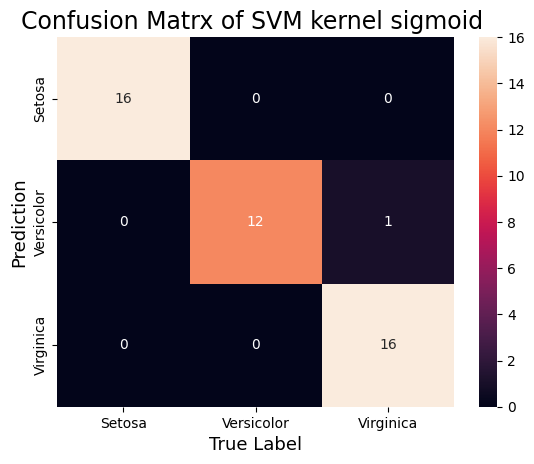

In [ ]:
  clf = SVC(kernel='rbf')
  clf.fit(X_train, y_train)
  test_pred = clf.predict(X_test)

  svm_result = confusion_matrix(y_test, test_pred)
  sns.heatmap(svm_result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

  plt.ylabel("Prediction", fontsize=13)
  plt.xlabel('True Label', fontsize=13)
  plt.title(f"Confusion Matrx of SVM kernel RBF ", fontsize=17)

Text(0.5, 1.0, 'Confusion Matrx of SVM kernel Sigmoid ')

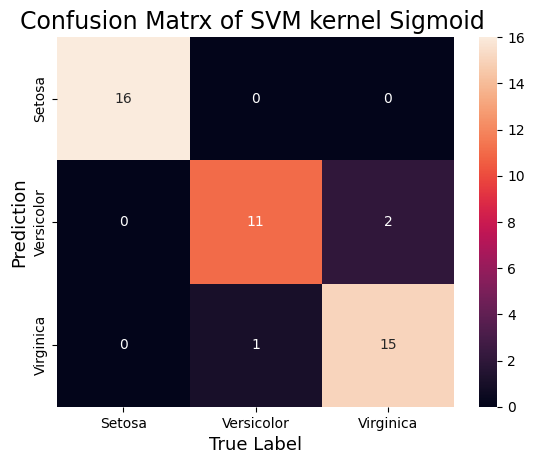

In [ ]:

  clf = SVC(kernel='sigmoid')
  clf.fit(X_train, y_train)
  test_pred = clf.predict(X_test)

  svm_result = confusion_matrix(y_test, test_pred)
  sns.heatmap(svm_result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

  plt.ylabel("Prediction", fontsize=13)
  plt.xlabel('True Label', fontsize=13)
  plt.title(f"Confusion Matrx of SVM kernel Sigmoid ", fontsize=17)

Evidently from accuracy meansures and the Confusion Matrix with Heatmap of Seaborn, we can say that kernel type of `linear` performs best for the Iris Dataset

In [ ]:
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)
test_pred = clf.predict(X_test)

SVM_result = classification_report(y_test, test_pred)
print(f"Classification Report: \n{SVM_result}")

SVM_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {SVM_acc*100}")

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 97.77777777777777


## 3. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.9333333333333333

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.9777777777777777

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.9555555555555556

In [ ]:
k_list = []
acc_list = []

for i in range(1, 20):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train, y_train)
  y_pred = KNN.predict(X_test)

  acc = accuracy_score(y_test, y_pred)

  k_list.append(i)
  acc_list.append(acc)

  print(f"Accuracy of k={i}: {acc}")

Accuracy of k=1: 0.9333333333333333
Accuracy of k=2: 0.9111111111111111
Accuracy of k=3: 0.9555555555555556
Accuracy of k=4: 0.9111111111111111
Accuracy of k=5: 0.9333333333333333
Accuracy of k=6: 0.9555555555555556
Accuracy of k=7: 0.9777777777777777
Accuracy of k=8: 0.9333333333333333
Accuracy of k=9: 0.9777777777777777
Accuracy of k=10: 0.9555555555555556
Accuracy of k=11: 0.9777777777777777
Accuracy of k=12: 0.9777777777777777
Accuracy of k=13: 0.9777777777777777
Accuracy of k=14: 0.9555555555555556
Accuracy of k=15: 0.9777777777777777
Accuracy of k=16: 0.9777777777777777
Accuracy of k=17: 0.9777777777777777
Accuracy of k=18: 0.9777777777777777
Accuracy of k=19: 0.9777777777777777


In [ ]:
acc_list

[0.9333333333333333,
 0.9111111111111111,
 0.9555555555555556,
 0.9111111111111111,
 0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9333333333333333,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

Text(0.5, 1.0, 'Confusion Matrx of KNN ')

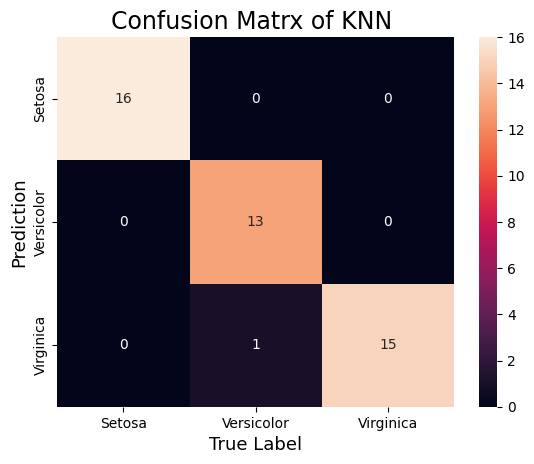

In [ ]:
from sklearn.metrics import classification_report, pair_confusion_matrix

KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

result = confusion_matrix(y_test, y_pred)

sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])

plt.ylabel("Prediction", fontsize=13)
plt.xlabel('True Label', fontsize=13)
plt.title("Confusion Matrx of KNN ", fontsize=17)

In [ ]:
KNN_result = classification_report(y_test, y_pred)
print(f"KNN Classification report : {KNN_result}")

KNN_acc = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy : {KNN_acc}")

KNN Classification report :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

KNN Accuracy : 0.9777777777777777


Text(0.5, 1.0, 'K vs Accuracy')

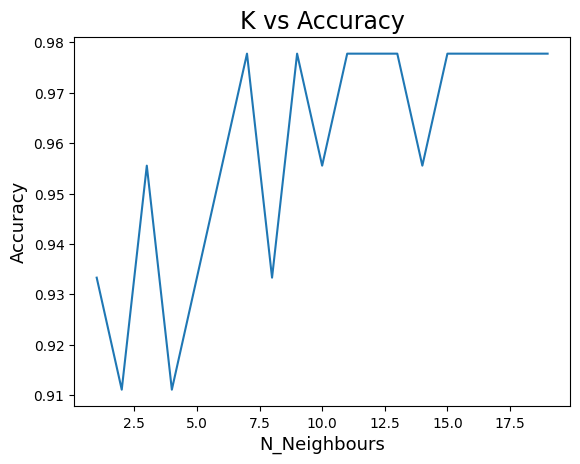

In [ ]:
plt.plot(k_list, acc_list)
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('N_Neighbours', fontsize=13)
plt.title("K vs Accuracy", fontsize=17)